In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, PrecisionRecallDisplay, RocCurveDisplay, auc, roc_curve

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("../creditcard.csv")
df.shape

(284807, 31)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


**NOTE:** Pricipal component are in comparable range specially in first and third quantile distance. But the Amount and Time shoulde be care of.

In [5]:
# Checkind class imbalance
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

**NOTE**: The Data is highly imbalanced and it should be cared of.

<Axes: xlabel='V1', ylabel='V2'>

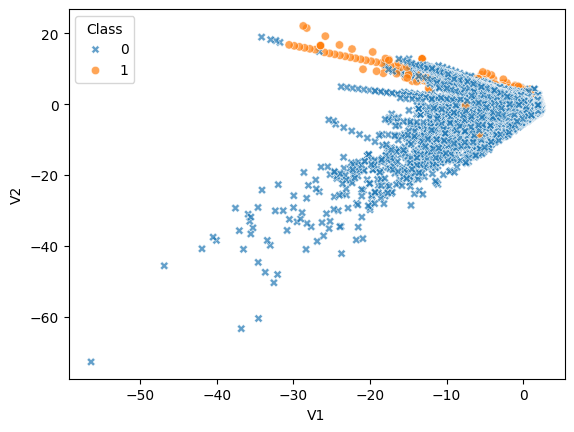

In [6]:
# Visualizing the data based on first and second principal components
sns.scatterplot(data=df, x="V1", y="V2", hue="Class", alpha=0.7, style= "Class", style_order=(1,0))

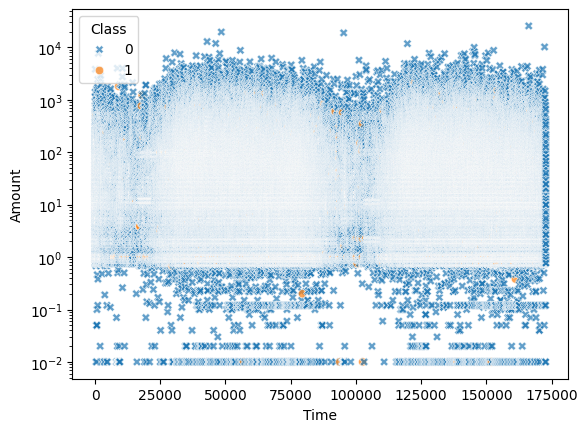

In [7]:
# Visualizing the data based on Time and Amount
sns.scatterplot(data=df, x="Time", y="Amount", hue="Class", alpha=0.7, style= "Class", style_order=(1,0))
plt.yscale("log")

<Axes: >

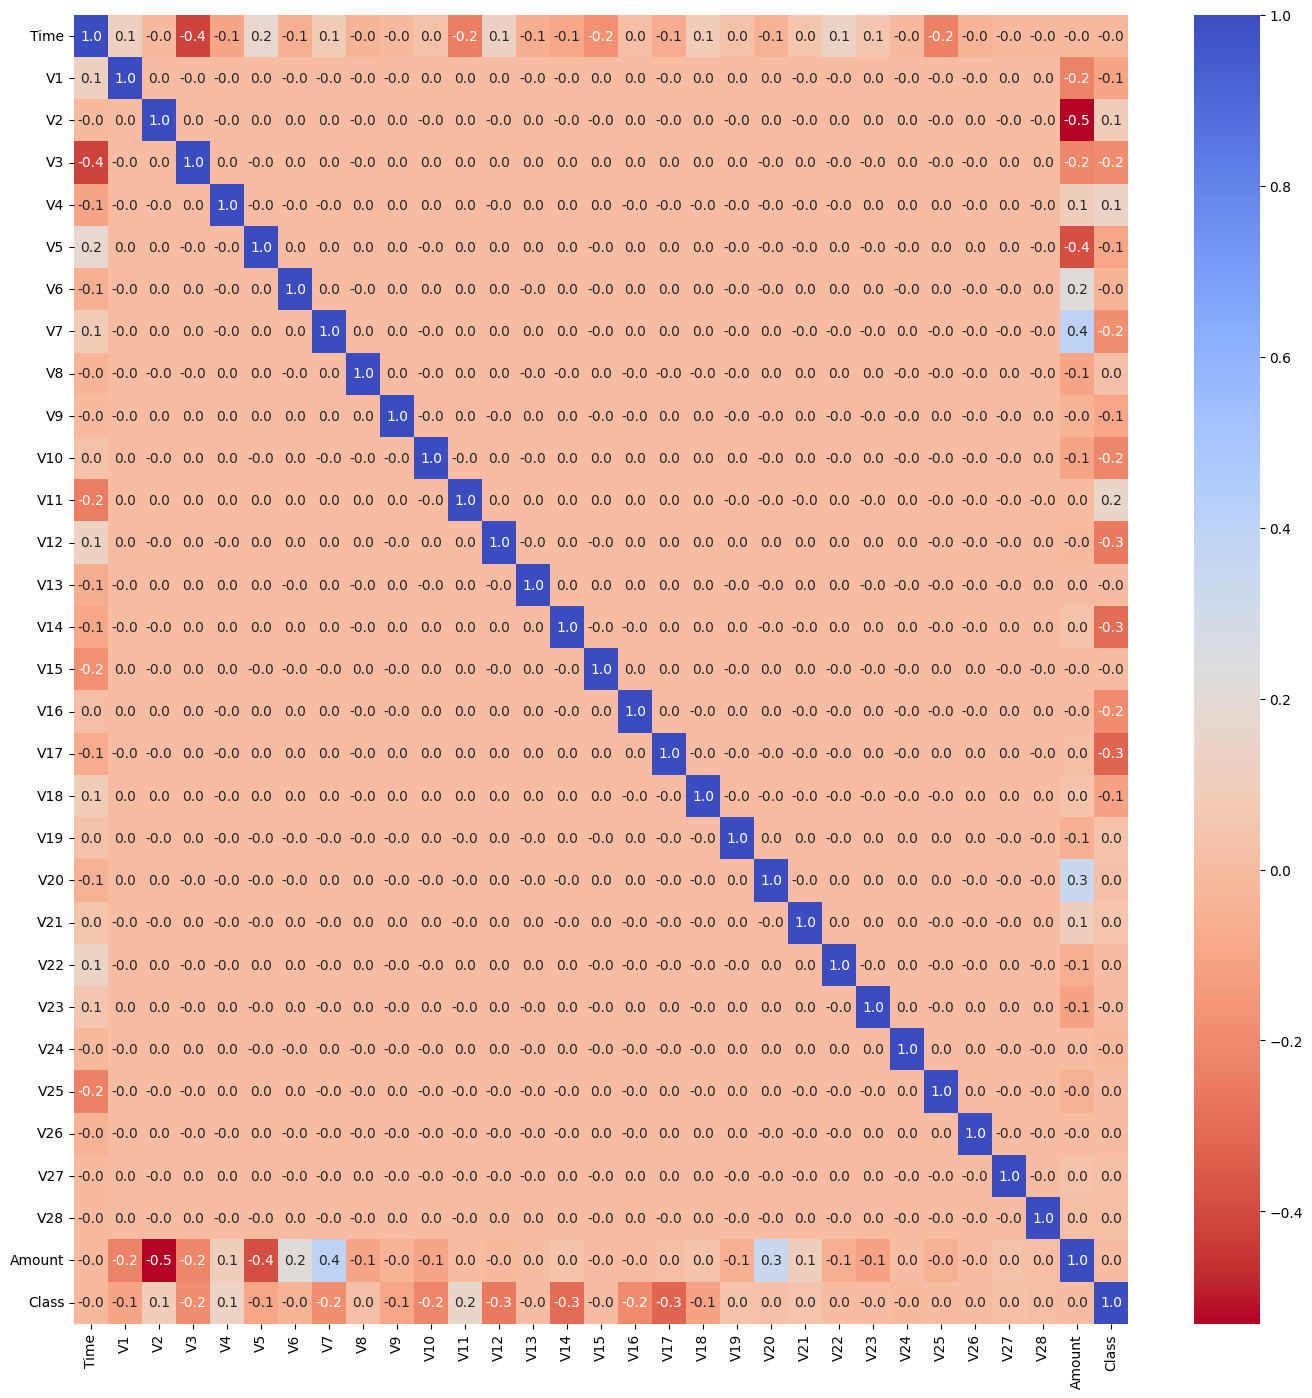

In [8]:
co_mat=df.corr()

plt.figure(figsize=(17,17))
sns.heatmap(co_mat, annot=True, fmt=".1f", cmap='coolwarm_r')

### Preparing the data

In [9]:
# Separating label from features

X=df.drop("Class", axis=1)
y=df["Class"]
X.shape, y.shape

((284807, 30), (284807,))

In [37]:
# Separating Train and Test set
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [38]:
# Scaling all data to have a clean distribution

scale=RobustScaler()

X_train['scaled_amount'] = scale.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_train['scaled_time'] = scale.fit_transform(X_train['Time'].values.reshape(-1,1))
X_train.drop(['Time','Amount'], axis=1, inplace=True)


X_test['scaled_amount'] = scale.fit_transform(X_test['Amount'].values.reshape(-1,1))
X_test['scaled_time'] = scale.fit_transform(X_test['Time'].values.reshape(-1,1))
X_test.drop(['Time','Amount'], axis=1, inplace=True)

In [39]:
print("Train", y_train.value_counts()/X_train.shape[0]*100)
print("Test", y_test.value_counts()/X_test.shape[0]*100)

Train Class
0    99.827075
1     0.172925
Name: count, dtype: float64
Test Class
0    99.827955
1     0.172045
Name: count, dtype: float64


In [40]:
y_train.value_counts()

Class
0    227451
1       394
Name: count, dtype: int64

In [42]:
#Shuffle all data
df_train=pd.concat([X_train, y_train], axis=1)
df_train = df_train.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_train = df_train.loc[df_train['Class'] == 1]
non_fraud_train = df_train.loc[df_train['Class'] == 0][:394]

normal_distributed_df = pd.concat([fraud_train, non_fraud_train])
print(normal_distributed_df["Class"].value_counts())

Class
1    394
0    394
Name: count, dtype: int64


<Axes: >

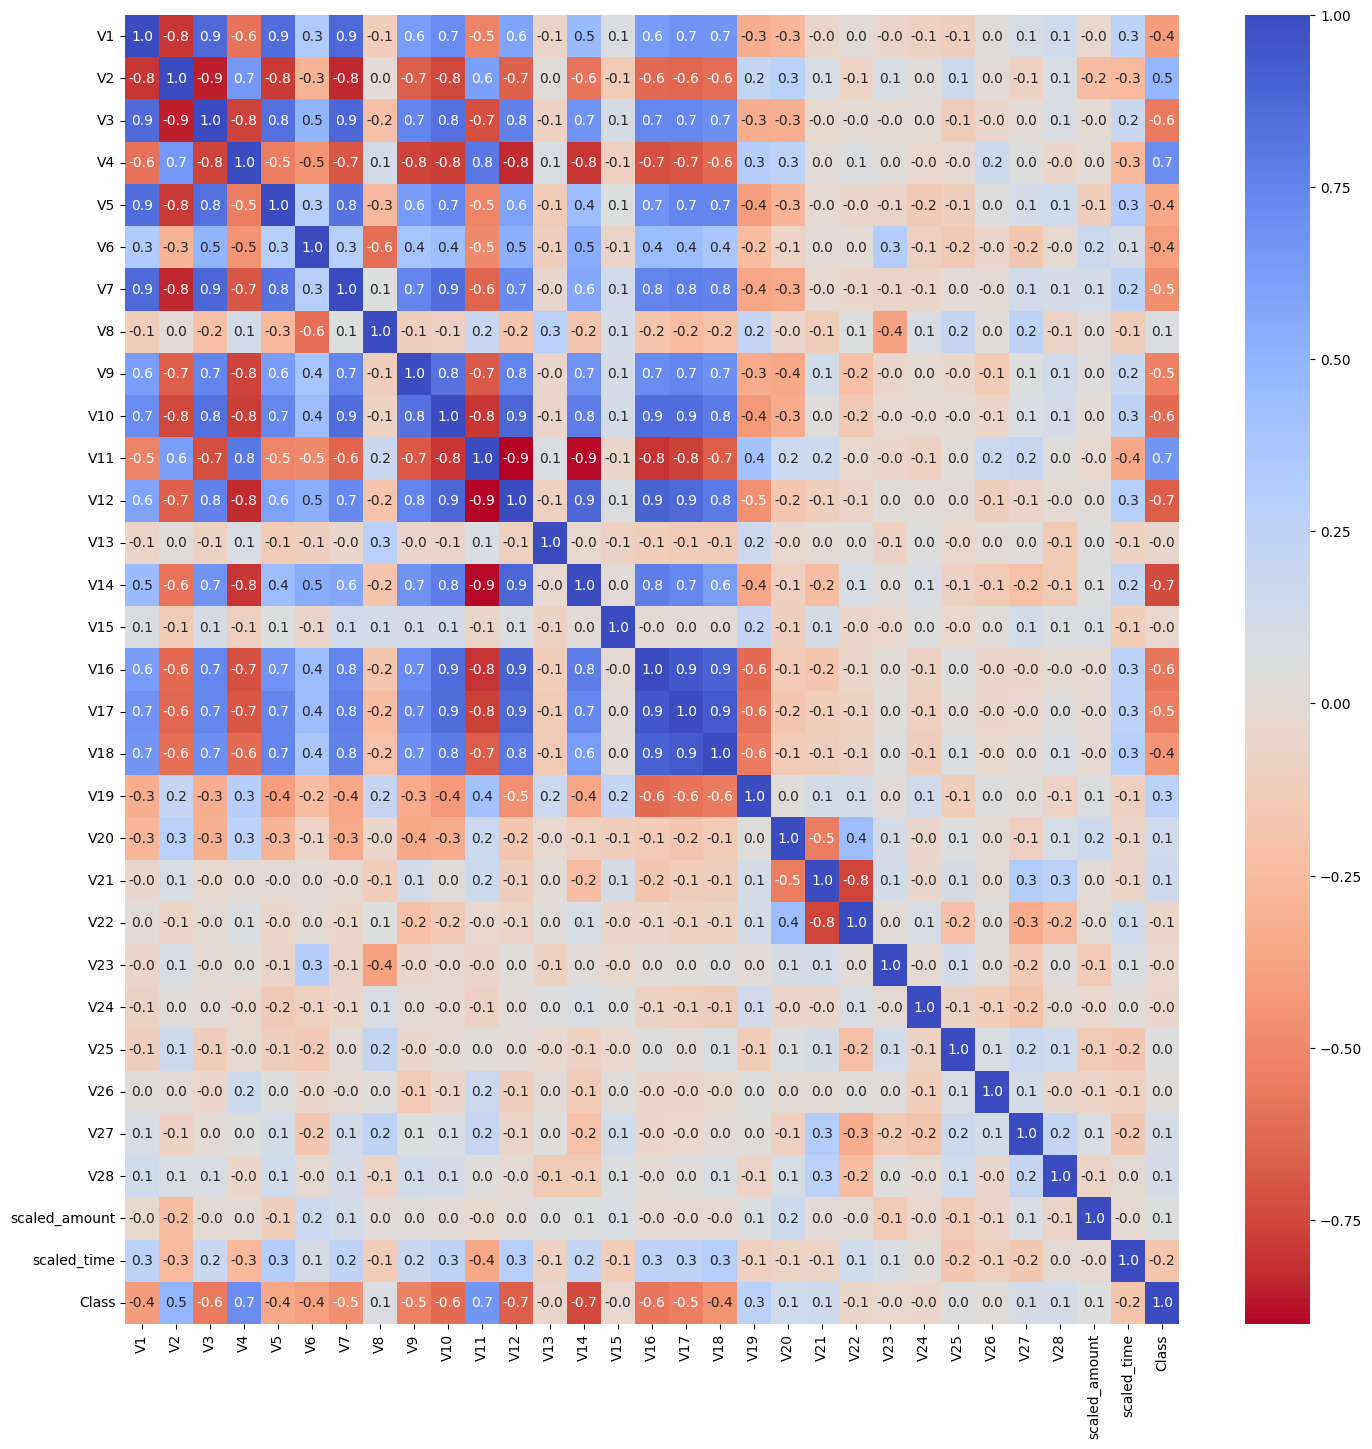

In [43]:
co_mat=normal_distributed_df.corr()

plt.figure(figsize=(17,17))
sns.heatmap(co_mat, annot=True, fmt=".1f", cmap='coolwarm_r')

In [44]:
co_mat["Class"][co_mat["Class"]<-0.6]

V10   -0.619800
V12   -0.663842
V14   -0.741460
Name: Class, dtype: float64

In [45]:
co_mat["Class"][co_mat["Class"]>0.4]

V2       0.486213
V4       0.709524
V11      0.670103
Class    1.000000
Name: Class, dtype: float64

The features with positive correlatation over 0.4 are V2, V4, and V11, and with negative correlation under -0.6 are V10, V12, and V14.

### Outlier Detection and Elemination

In [46]:
def outlierdetector(df, list_of_columns):
    for column in list_of_columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3-q1
        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3 + 1.5 * iqr
        return df.drop(df[(df[column] > Upper_tail) | (df[column] < Lower_tail)].index)

In [47]:
important_features=["V10", "V12", "V14", "V2", "V4", "V11"]
df_outlierless=outlierdetector(normal_distributed_df, important_features)
df_outlierless.shape

(721, 31)

In [116]:
X_train_new=df_outlierless.drop("Class", axis=1)
y_train_new=df_outlierless["Class"]

X_train_new.shape, y_train_new.value_counts()

((721, 30),
 Class
 0    392
 1    329
 Name: count, dtype: int64)

## Model Development

### Logistic Regression

In [121]:
LR=LogisticRegression()
LR.fit(X_train_new, y_train_new)
LR.score(X_train, y_train), LR.score(X_test, y_test)

(0.9773091355965678, 0.9775464344650819)

In [122]:
y_pred=LR.predict(X_test)
print(classification_report(y_test, y_pred, labels=LR.classes_))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.93      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962



Text(0.5, 1.0, 'Confusion Matrix')

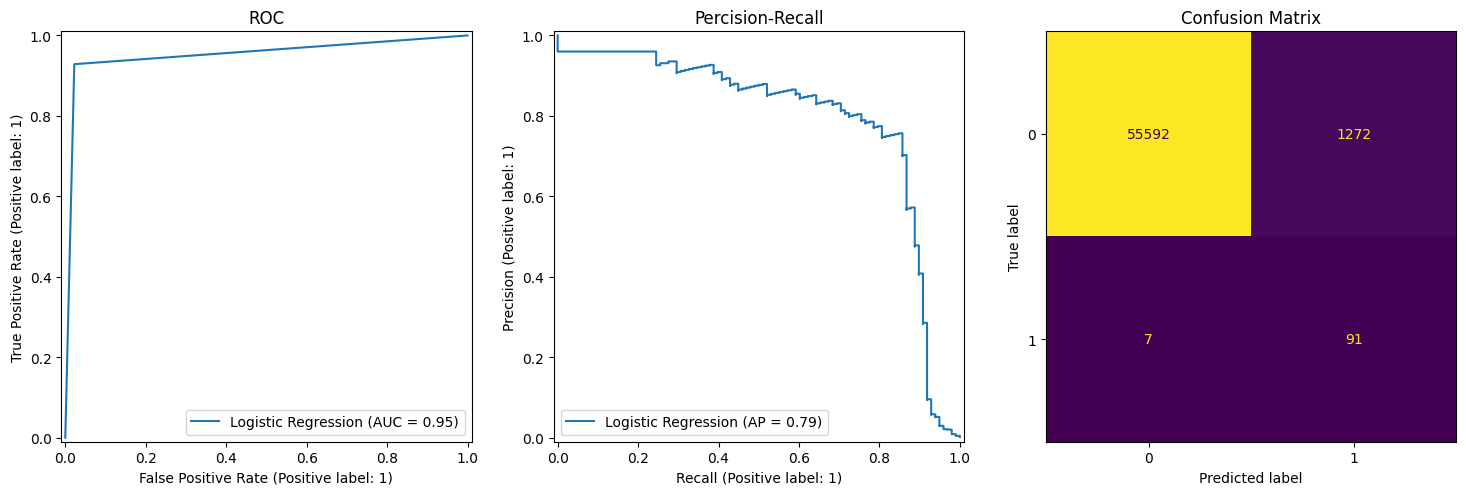

In [123]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
ROC=RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, name='Logistic Regression', pos_label=1)
ROC.plot(ax=ax1)
ax1.set_title("ROC")

PrecisionRecallDisplay.from_estimator(LR, X_test, y_test, name="Logistic Regression", ax=ax2)
ax2.set_title("Percision-Recall")

cfx = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax3, colorbar=False)
ax3.set_title("Confusion Matrix")

### SVM

In [137]:
svm=SVC()
svm.fit(X_train_new, y_train_new)
svm.score(X_train_new, y_train_new), svm.score(X_test, y_test)

(0.9320388349514563, 0.983761103893824)

In [140]:
y_pred=svm.predict(X_test)
print(classification_report(y_test, y_pred, labels=svm.classes_))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.92      0.16        98

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.58     56962
weighted avg       1.00      0.98      0.99     56962



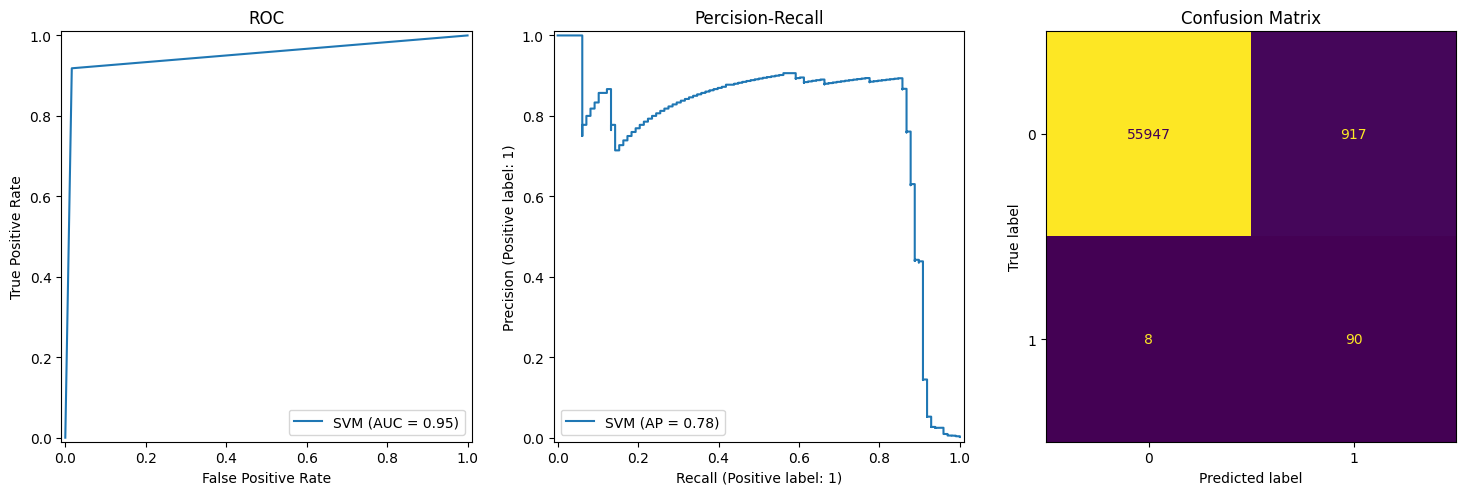

In [142]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
ROC=RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, name='SVM')
ROC.plot(ax=ax1)
ax1.set_title("ROC")

PrecisionRecallDisplay.from_estimator(XGB, X_test, y_test, name="SVM", ax=ax2)
ax2.set_title("Percision-Recall")

cfx = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax3, colorbar=False)
ax3.set_title("Confusion Matrix");

### Random Forest

In [124]:
RF=RandomForestClassifier()
RF.fit(X_train_new, y_train_new)
RF.score(X_train, y_train), RF.score(X_test, y_test)

(0.9832429941407536, 0.9828131034724904)

In [125]:
y_pred=RF.predict(X_test)
cm=confusion_matrix(y_test, y_pred, labels=RF.classes_)
print(classification_report(y_test, y_pred, labels=RF.classes_))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.91      0.15        98

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.57     56962
weighted avg       1.00      0.98      0.99     56962



Text(0.5, 1.0, 'Confusion Matrix')

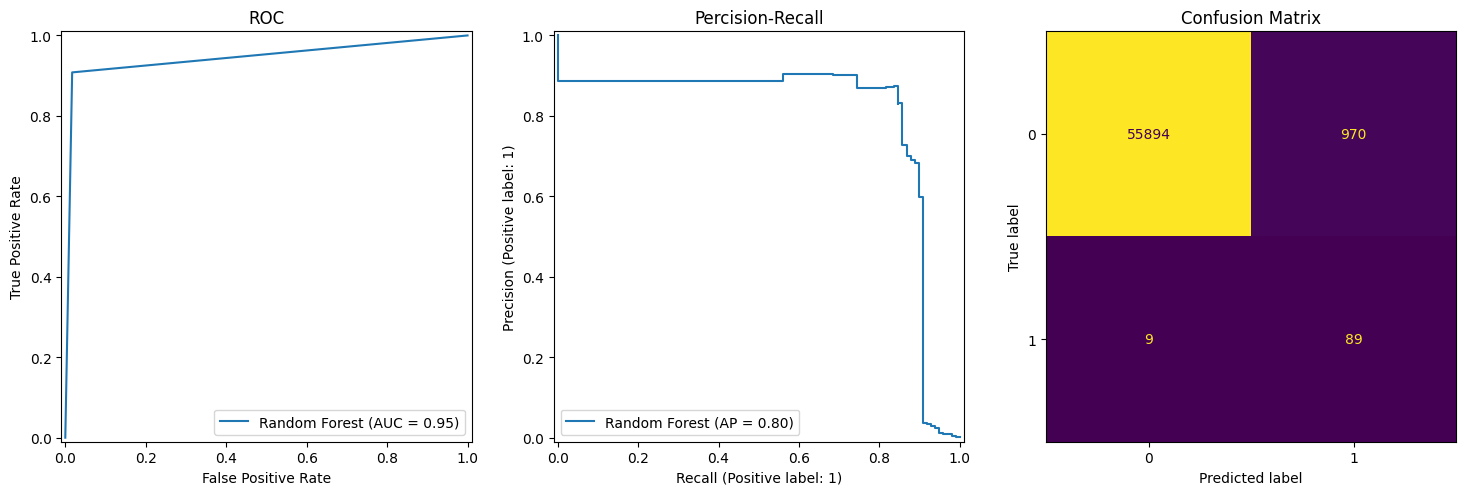

In [126]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
ROC=RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, name='Random Forest')
ROC.plot(ax=ax1)
ax1.set_title("ROC")

PrecisionRecallDisplay.from_estimator(RF, X_test, y_test, name="Random Forest", ax=ax2)
ax2.set_title("Percision-Recall")

cfx = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax3, colorbar=False)
ax3.set_title("Confusion Matrix")

### XGBoost

In [128]:
XGB=xgb.XGBClassifier()
XGB.fit(X_train_new, y_train_new)
XGB.score(X_train, y_train), XGB.score(X_test, y_test)

(0.9618380916851368, 0.9614830939924862)

In [129]:
y_pred=XGB.predict(X_test)
print(classification_report(y_test, y_pred, labels=XGB.classes_))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.93      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.96      0.98     56962



Text(0.5, 1.0, 'Confusion Matrix')

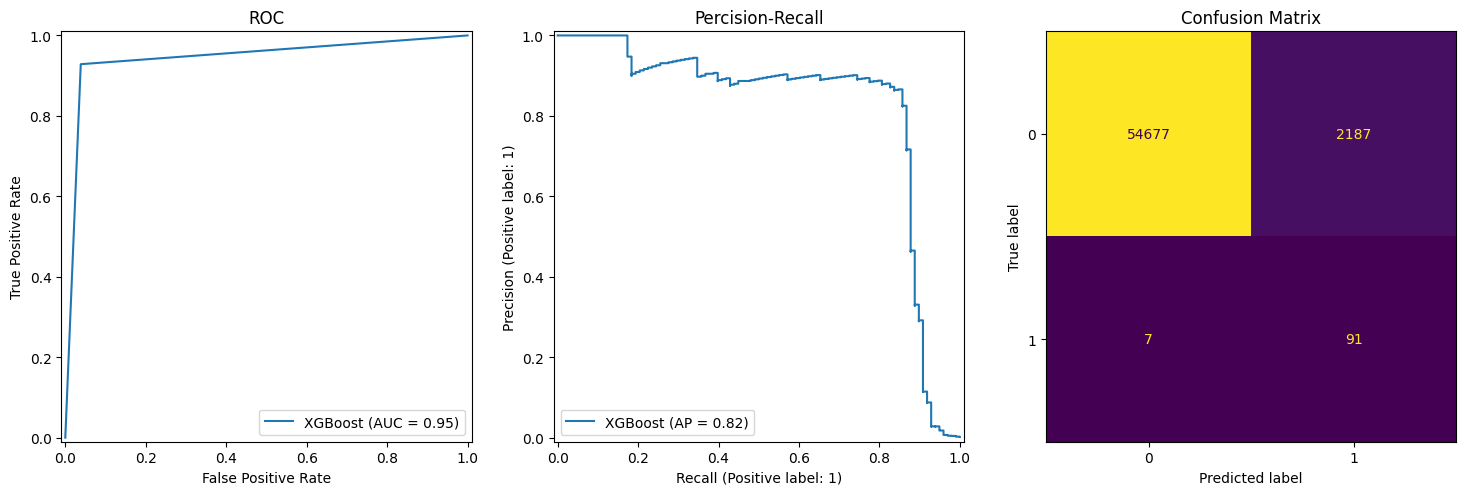

In [130]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
ROC=RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, name='XGBoost')
ROC.plot(ax=ax1)
ax1.set_title("ROC")

PrecisionRecallDisplay.from_estimator(XGB, X_test, y_test, name="XGBoost", ax=ax2)
ax2.set_title("Percision-Recall")

cfx = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax3, colorbar=False)
ax3.set_title("Confusion Matrix")

#### XGB Hypertuning

In [131]:
XGB = xgb.XGBClassifier(objective='binary:logistic', eval_metric='aucpr', use_label_encoder=False)

# Define the parameter distributions
param_dist = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    #'scale_pos_weight': [1, 10, 100, 600]
}

# Setup Stratified Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# 4. Initialize Randomized Search
random_search = RandomizedSearchCV(
    estimator=XGB,
    param_distributions=param_dist,
    n_iter=50,           # Number of random combinations to try
    scoring='average_precision', # Search goal: Best Precision-Recall AUC
    cv=cv,
    verbose=3,
    random_state=1,
    n_jobs=-1            # Use all CPU cores
)

# Fit the model
random_search.fit(X_train_new, y_train_new)

print(f"Best Score (PR-AUC): {random_search.best_score_}")
print(f"Best Params: {random_search.best_params_}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Score (PR-AUC): 0.9763842870878616
Best Params: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.01, 'colsample_bytree': 1.0}


In [132]:
random_search.best_params_

{'subsample': 0.8,
 'n_estimators': 500,
 'max_depth': 9,
 'learning_rate': 0.01,
 'colsample_bytree': 1.0}

In [134]:
XGB=xgb.XGBClassifier(eval_metric='aucpr', subsample=0.8, n_estimators=500, max_depth=9, learning_rate=0.01, colsample_bytree=1)
XGB.fit(X_train_new, y_train_new)
XGB.score(X_train, y_train), XGB.score(X_test, y_test)

(0.970734490552788, 0.9699273199676978)

In [135]:
y_pred=XGB.predict(X_test)
print(classification_report(y_test, y_pred, labels=XGB.classes_))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.93      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



Text(0.5, 1.0, 'Confusion Matrix')

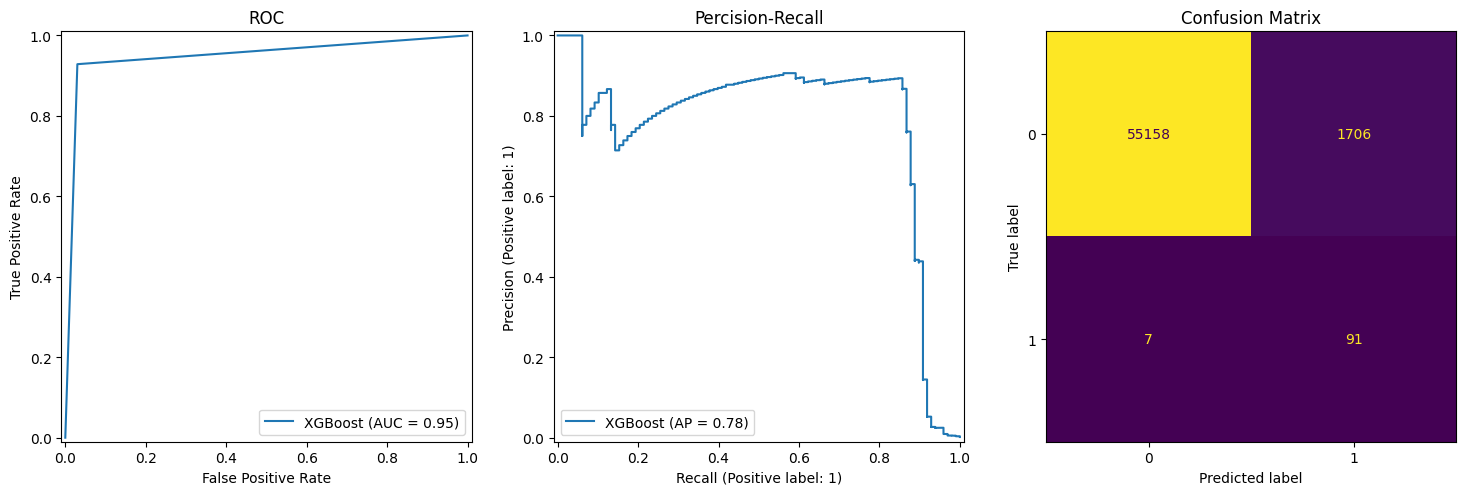

In [136]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
ROC=RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, name='XGBoost')
ROC.plot(ax=ax1)
ax1.set_title("ROC")

PrecisionRecallDisplay.from_estimator(XGB, X_test, y_test, name="XGBoost", ax=ax2)
ax2.set_title("Percision-Recall")

cfx = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax3, colorbar=False)
ax3.set_title("Confusion Matrix")